In [1]:
from astropy.table import Table
from matplotlib import pyplot
import seaborn

from pathlib import Path

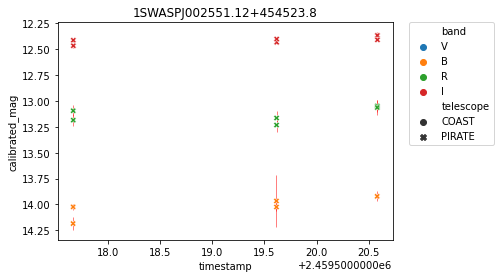

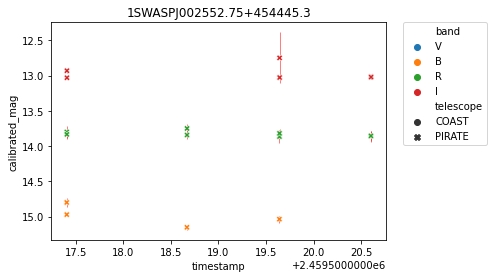

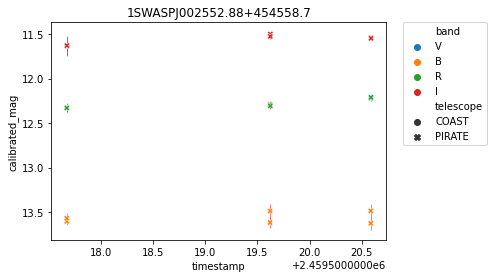

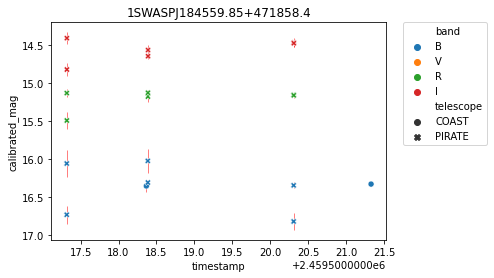

No handles with labels found to put in legend.


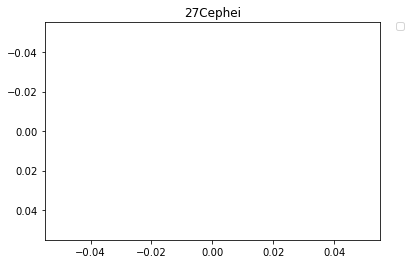

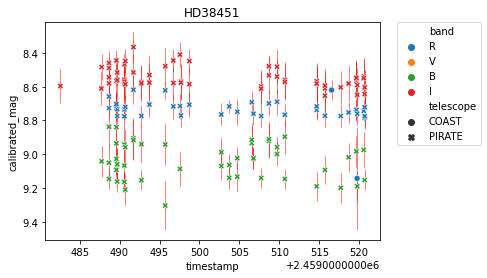

In [2]:
for table in Path('data').glob('*.ecsv'):
    photometry = Table.read(table)
    photometry = photometry[photometry['FLAGS'] == 0]
    fig = pyplot.figure()
    mag = seaborn.scatterplot(
        x=photometry['timestamp'],
        y=photometry['calibrated_mag'],
        hue=photometry['band'],
        style=photometry['telescope'],
    )
    pyplot.errorbar(
        photometry['timestamp'],
        photometry['calibrated_mag'],
        yerr=photometry['calibrated_mag_err'],
        ecolor='red',
        ls='none',
        zorder=-1,
        alpha=0.5,
        elinewidth=1,
    )
    mag.invert_yaxis()
    mag.set(title=table.stem)
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pyplot.show()